# Movie Reviews Analysis Sentiment ML

## 1. Preparations

### 1.1 Library Preparations

In [10]:
pip install pandas nltk spacy beautifulsoup4 tqdm scikit-learn matplotlib wordcloud gensim fasttext-wheel seaborn

  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [seaborn]m1/2 [seaborn]
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 1.2 Dataset Preparations

In [2]:
import pandas as pd

df = pd.read_csv('datasets/raw/IMDB_dataset.csv')
df.sample(10)

,review,sentiment
16467,Alien Warrior (or King of The Streets) is one ...,positive
15202,Frank Sinatra starred in this odd little short...,positive
18047,"Yes, talk about bad sequels. Rick Moranis star...",negative
48348,"Yes, my summary just about tells it all.<br />...",negative
17748,BEWARE SPOILERS. This movie was okay. Goldie H...,positive
32095,Director and auteur Jean-Pierre Rappenau was 8...,positive
28640,Tim Meadows has to be the most underrated of S...,positive
49469,"Sure, most of the slasher films of the 1980's ...",negative
10363,Here are the matches . . . (adv. = advantage)<...,negative
13894,You can do a lot with a little cash. Blair Wit...,positive


In [3]:
df.count()

review       50000
sentiment    50000
dtype: int64

In [4]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### 1.3 Dataset Cleaning

#### 1.3.1 Cleaning

In [6]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
import re
import string
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from html import unescape

In [8]:
# Download NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load spacy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt_tab to /home/user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
# Stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = unescape(text)
    
    # 1. Remove HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 3. Remove emoji / non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # 4. Lowercase
    text = text.lower()
    
    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 6. Tokenization
    tokens = word_tokenize(text)
    
    # 7. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # 8. Lemmatization using spaCy
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]
    
    # 9. Normalize whitespace & join back to string
    clean_text = " ".join(tokens)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    
    return clean_text

In [11]:
df_test = df.iloc[1]['review']
df_test

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [12]:
df_cleaned_test = preprocess_text(df_test)
df_cleaned_test

'wonderful little production filming technique unassume oldtimebbc fashion give comfort sometimes discomforte sense realism entire piece actor extremely well choose michael sheen get polari voice pat truly see seamless editing guide reference williams diary entry well worth watching terrificly write perform piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remain solid disappear play knowledge sense particularly scene concern orton halliwell set particularly flat halliwell mural decorate every surface terribly well do'

In [ ]:
# df['clean_review'] = df['review'].apply(preprocess_text)
# df['clean_review'].sample(10)

In [13]:
positive_df = df[df['sentiment'] == 'positive'].sample(n=500, random_state=42)
negative_df = df[df['sentiment'] == 'negative'].sample(n=500, random_state=42)

# Gabungkan dan shuffle
df_sample = pd.concat([positive_df, negative_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Cek distribusi
print(df_sample['sentiment'].value_counts())
df_sample.head()

sentiment
negative    500
positive    500
Name: count, dtype: int64


,review,sentiment
0,"For Daniel Auteuil, `Queen Margot' was much be...",negative
1,Spoilers abound. You have been warned.<br /><b...,negative
2,"Where do I start? The plot of the movie, which...",negative
3,There was a genie played by Shaq His name was ...,negative
4,Its a very good comedy movie.Ijust liked it.I ...,positive


In [14]:
from tqdm import tqdm
tqdm.pandas()

df_sample['clean_review'] = df_sample['review'].progress_apply(preprocess_text)
df_sample.sample(5)

100%|██████████| 1000/1000 [00:43<00:00, 23.24it/s]


,review,sentiment,clean_review
302,Forbidden Planet rates as landmark in science ...,positive,forbid planet rate landmark science fiction ca...
132,"When I watched this film the first time, it wa...",positive,watch film first time tape copy title wasis ca...
636,"for many and many years, gaijin have visited j...",positive,many many year gaijin visit japan learn martia...
270,"This is a film that has it all, the dashing he...",positive,film dash hero beautiful damsel distress noble...
784,'Steamboat Willie (1928)' is often erroneously...,positive,steamboat willie 1928 often erroneously tout f...


In [15]:
df_sample.to_csv('datasets/cleaned/IMDB_dataset_1000_cleaned.csv')

#### 1.3.2 Visualizing

In [23]:
df_sample.sample(10)

,review,sentiment,clean_review
3,There was a genie played by Shaq His name was ...,negative,genie play shaq name kazaam whack rhyme corny ...
316,"Another ""must have"" film. Henry Brandon is a f...",positive,another must film henry brandon favorite surpr...
489,This is why I still have nightmares.<br /><br ...,positive,still nightmaresthis terrifying film musical c...
259,I like this film for several reasons. I have a...,positive,like film several reason soft spot film intric...
228,This movie is filled with so many idiotic mome...,negative,movie fill many idiotic moment wonder ever get...
543,Yet another foreign war movie that puts hollyw...,positive,yet another foreign war movie put hollywood sh...
910,I am a huge fan of warrior movies. Some of my ...,negative,huge fan warrior movie favorite braveheart tro...
502,Nice character development in a pretty cool mi...,positive,nice character development pretty cool milieu ...
276,Liam Neeson portrays the Scottish legend Rober...,positive,liam neeson portray scottish legend robert roy...
819,"The biggest National Lampoon hit remains ""Anim...",negative,big national lampoon hit remain animal house r...


In [17]:
df_sample['sentiment'].value_counts()

sentiment
negative    500
positive    500
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt
from collections import Counter

# Pisahkan data berdasarkan sentimen
positive_reviews = df_sample[df_sample['sentiment'] == 'positive']['clean_review']
negative_reviews = df_sample[df_sample['sentiment'] == 'negative']['clean_review']

# Gabungkan teks jadi satu string per kategori
positive_words = " ".join(positive_reviews).split()
negative_words = " ".join(negative_reviews).split()

# Hitung frekuensi kata
positive_counts = Counter(positive_words).most_common(10)
negative_counts = Counter(negative_words).most_common(10)


##### Top 10 Most Word

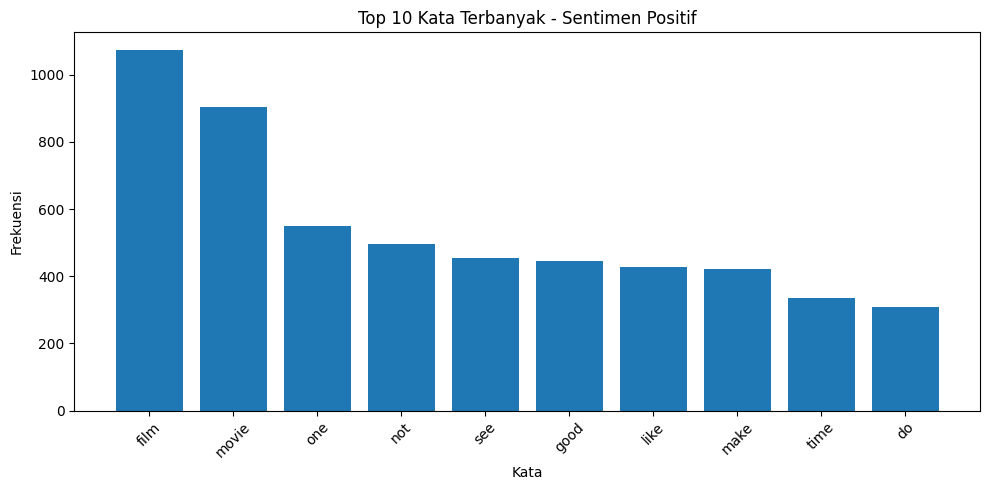

In [25]:
# Visualisasi positif
plt.figure(figsize=(10, 5))
words, counts = zip(*positive_counts)
plt.bar(words, counts)
plt.title("Top 10 Kata Terbanyak - Sentimen Positif")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

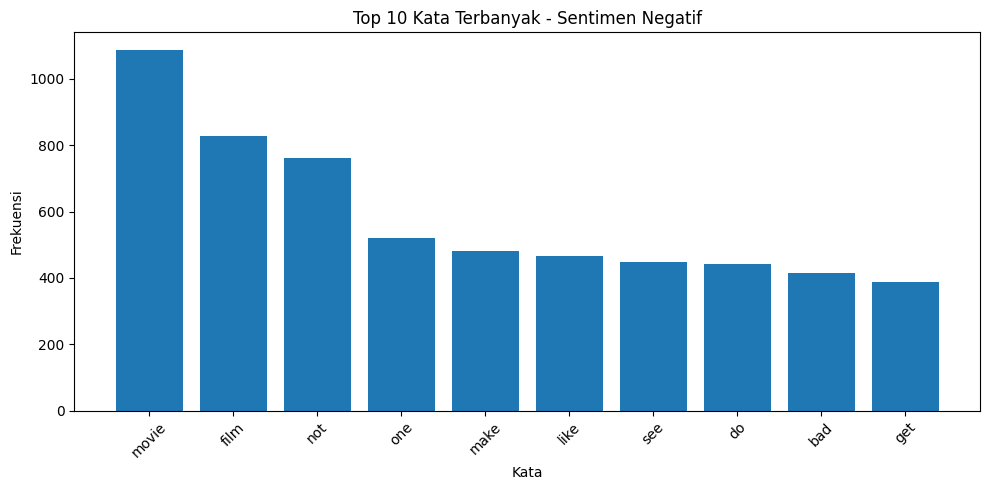

In [26]:
# Visualisasi negatif
plt.figure(figsize=(10, 5))
words, counts = zip(*negative_counts)
plt.bar(words, counts)
plt.title("Top 10 Kata Terbanyak - Sentimen Negatif")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Wordcloud

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil semua teks per sentimen
positive_text = " ".join(df_sample[df_sample['sentiment'] == 'positive']['clean_review'])
negative_text = " ".join(df_sample[df_sample['sentiment'] == 'negative']['clean_review'])

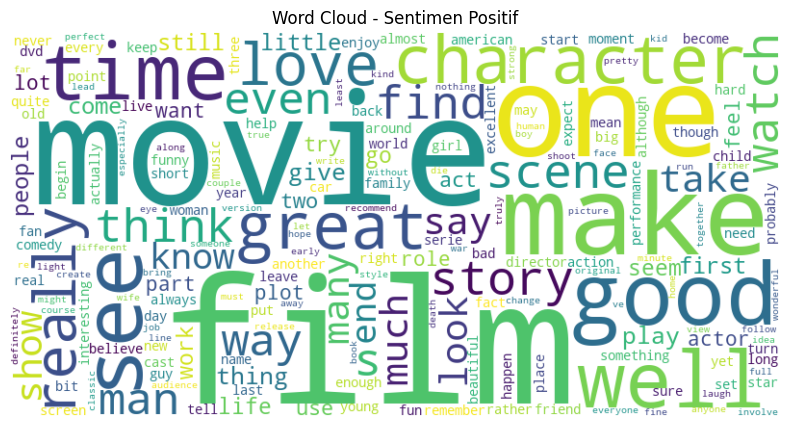

In [28]:
# WordCloud - Sentimen Positif
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentimen Positif')
plt.show()

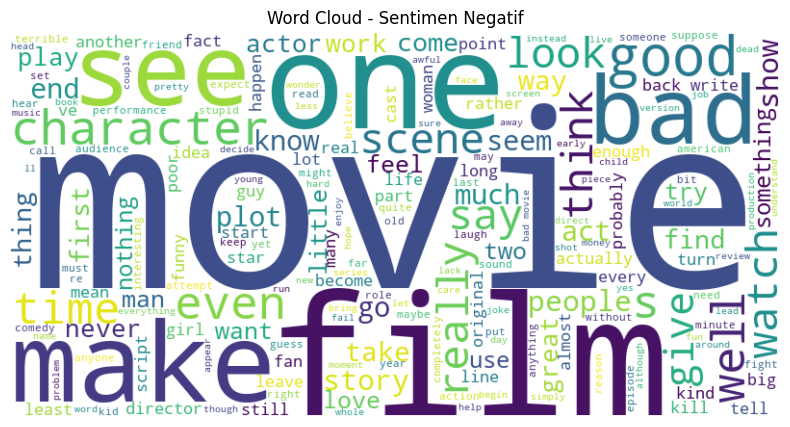

In [29]:
# WordCloud - Sentimen Negatif
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentimen Negatif')
plt.show()

### 1.4 Dataset Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv('datasets/cleaned/IMDB_dataset_1000_cleaned.csv')
df.sample(10)

,Unnamed: 0,review,sentiment,clean_review
1,1,Spoilers abound. You have been warned.<br /><b...,negative,spoiler abound warnedi thoroughly disappointed...
133,133,Do not waste your time watching this! Unless y...,negative,waste time watch unless want study wrong thing...
636,636,"for many and many years, gaijin have visited j...",positive,many many year gaijin visit japan learn martia...
801,801,There are just so many things wrong with this ...,negative,many thing wrong moviejeff bridges weird accen...
789,789,Where the Sidewalk Ends (1950)<br /><br />Wher...,positive,sidewalk end 1950where one end another beginst...
376,376,"Okay, so I love silly movies. If you enjoy sil...",positive,okay love silly movie enjoy silly scifi movie ...
313,313,I'm so glad I only got this movie for $5. Anim...,negative,glad get movie anime expensive doubt I ve eye ...
691,691,Hideously bad movie purportedly about a croupi...,negative,hideously bad movie purportedly croupier want ...
612,612,This is another of the many B minus movies tag...,negative,another many minus movie tag film noir hope ge...
620,620,Who wrote this? Some guy named John Cohen. I g...,negative,write guy name john cohen guess first screenpl...


In [2]:
df_filtered = df[df['sentiment'].isin(['positive', 'negative'])]
df_filtered

,Unnamed: 0,review,sentiment,clean_review
0,0,"For Daniel Auteuil, `Queen Margot' was much be...",negative,daniel auteuil queen margot much well nastassj...
1,1,Spoilers abound. You have been warned.<br /><b...,negative,spoiler abound warnedi thoroughly disappointed...
2,2,"Where do I start? The plot of the movie, which...",negative,start plot movie love two high school student ...
3,3,There was a genie played by Shaq His name was ...,negative,genie play shaq name kazaam whack rhyme corny ...
4,4,Its a very good comedy movie.Ijust liked it.I ...,positive,good comedy movieijust like iti do not know lo...
...,...,...,...,...
995,995,"A quiet, sweet and beutifully nostalgic movie ...",positive,quiet sweet beutifully nostalgic movie confron...
996,996,"First of all, I believe that this movie is muc...",positive,first believe movie much appreciated viewer ac...
997,997,"Reeves plays Haji Murad, a hero in 1850's Russ...",negative,reeves play haji murad hero 1850s russiathis b...
998,998,The Williams family live on a ranch located in...,positive,williams family live ranch locate middle remot...


#### 1.4.1 TF-IDF Vectorizing

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
vectorizer = TfidfVectorizer()

In [5]:
X_tfidf = vectorizer.fit_transform(df_filtered['clean_review'])
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 93601 stored elements and shape (1000, 17477)>

In [6]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,007,007s,010,053105,10,100,1000,10000,100000,1010,...,zone,zoney,zonke,zoo,zoom,zoweeforbidden,zshop,zucker,zulu,zuniga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_filtered.reset_index(drop=True, inplace=True)
tfidf_df.reset_index(drop=True, inplace=True)

In [8]:
df_final = pd.concat([df_filtered['sentiment'].reset_index(drop=True), tfidf_df], axis=1)
df_final

,sentiment,007,007s,010,053105,10,100,1000,10000,100000,...,zone,zoney,zonke,zoo,zoom,zoweeforbidden,zshop,zucker,zulu,zuniga
0,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
output_file_path = 'output/tfidf/IMDB_dataset_1000_tfidf.csv'
os.makedirs(os.path.dirname(output_file_path), exist_ok=True)
df_final.to_csv(output_file_path, index=False)

In [11]:
top_words = tfidf_df.max(axis=0).sort_values(ascending=False)
print("\n10 Kata Teratas berdasarkan Skor TF-IDF:")
print(top_words.head(10))


10 Kata Teratas berdasarkan Skor TF-IDF:
prot        0.839395
wirey       0.805356
snake       0.712631
batman      0.704792
puerto      0.684059
bettie      0.676152
car         0.671256
inuyasha    0.655103
eagle       0.650235
azumi       0.646823
dtype: float64


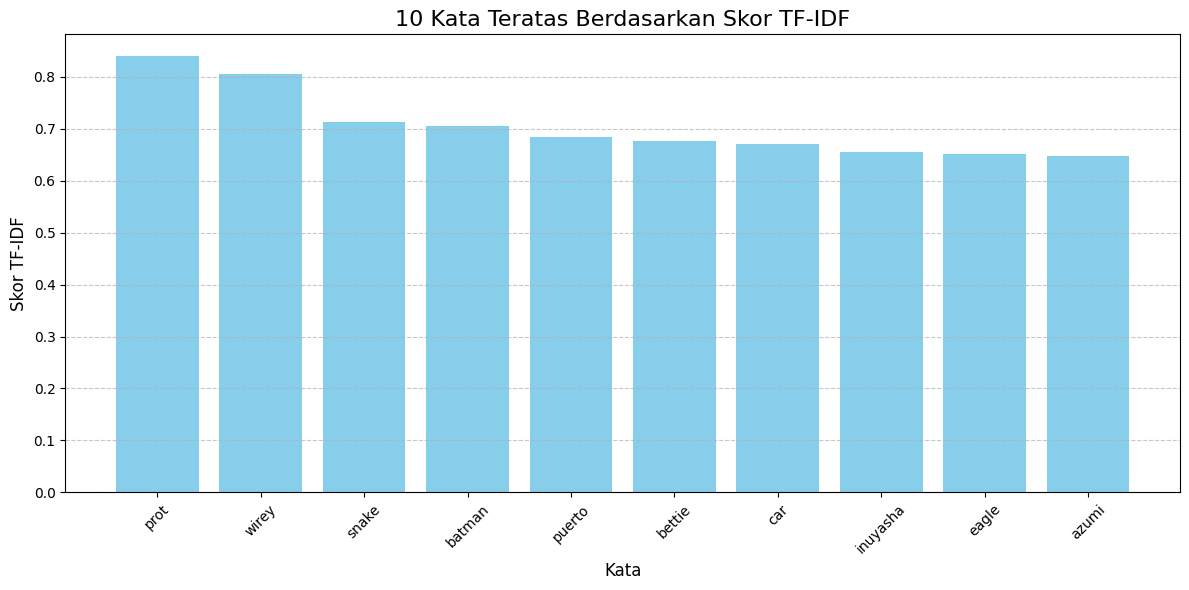

In [14]:
plt.figure(figsize=(12, 6))
top_10_words = top_words.head(10)
plt.bar(top_10_words.index, top_10_words.values, color='skyblue')
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Skor TF-IDF', fontsize=12)
plt.title('10 Kata Teratas Berdasarkan Skor TF-IDF', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
word_scores = {word: score for word, score in zip(top_words.index, top_words.values)}

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'  # Pilihan warna
).generate_from_frequencies(word_scores)

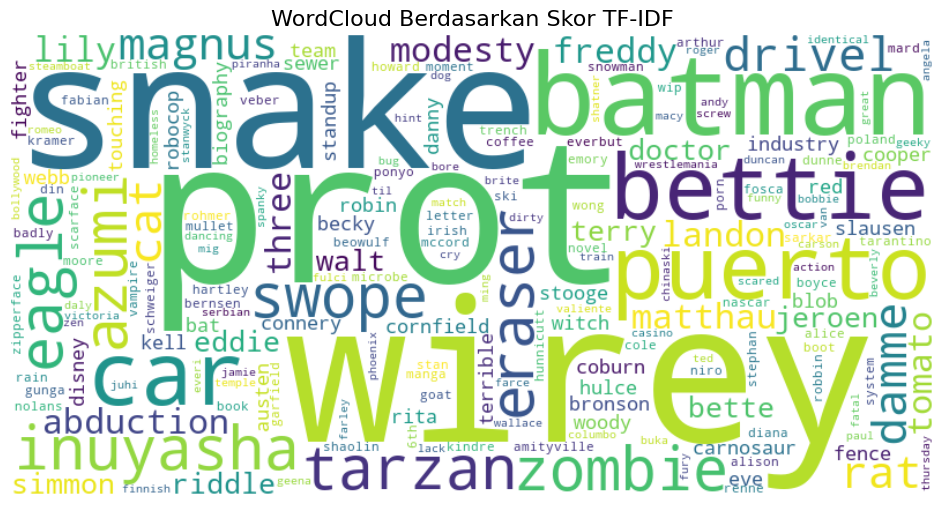

In [16]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Berdasarkan Skor TF-IDF', fontsize=16)
plt.show()

#### 1.4.2 FastText Vectorizing

In [12]:
import fasttext
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
pip install numpy==1.24.4

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [13]:
train_data = 'output/fasttext/IMDB_dataset_1000_fasttext.txt'

with open(train_data, 'w') as f:
    for index, row in df_filtered.iterrows():
        label = '__label__' + row['sentiment']
        text = row['clean_review'].replace('\n', ' ')
        f.write(f'{label} {text}\n')

In [14]:
model_fasttext = fasttext.train_supervised(train_data, lr=1.0, epoch=25, wordNgrams=2)

Read 0M words
Number of words:  17484
Number of labels: 2
Progress: 100.0% words/sec/thread:  628471 lr:  0.000000 avg.loss:  0.098826 ETA:   0h 0m 0s


In [15]:
def predict_fasttext(text):
    if pd.notnull(text):
        try:
            label, _ = model_fasttext.predict(text)
            return label[0]
        except Exception as e:
            print(f"Error saat memproses teks: {text} - {e}")
    return None

In [16]:
df_filtered['fasttext_sentiment'] = df_filtered['clean_review'].apply(predict_fasttext)

In [18]:
df_final = pd.concat([df_filtered[['clean_review', 'sentiment', 'fasttext_sentiment']], tfidf_df], axis=1)
df_final.sample(5)

,clean_review,sentiment,fasttext_sentiment,007,007s,010,053105,10,100,1000,...,zone,zoney,zonke,zoo,zoom,zoweeforbidden,zshop,zucker,zulu,zuniga
897,really love movie have not play final fantasy ...,positive,__label__positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,intrigue exciting dramatic explosive complex e...,positive,__label__positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914,drive lesson little film sneak first seem bit ...,positive,__label__positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,funniest movie everbut watch film least year f...,negative,__label__negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
722,jim wynorski strike literal minded komodo cobr...,negative,__label__negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_final['fasttext_sentiment_num'] = df_final['fasttext_sentiment'].map({'__label__positive': 1, '__label__negative': 0})
df_final.sample(5)

,clean_review,sentiment,fasttext_sentiment,007,007s,010,053105,10,100,1000,...,zoney,zonke,zoo,zoom,zoweeforbidden,zshop,zucker,zulu,zuniga,fasttext_sentiment_num
446,hubert selby give book requiem dream cowrote s...,negative,__label__negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
963,jamie foxx would ever deliver wonderful oscarw...,negative,__label__negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
577,film powerful philosophical ending end mean wa...,positive,__label__positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
767,eight jean rollin film watch also possibly wei...,negative,__label__negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
970,conversation parent tell british cinema goer 1...,negative,__label__negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082166,0.0,0


In [23]:
output_file_path_with_fasttext = 'output/hybrid/IMDB_dataset_1000_tfidf_fasttext.csv'
df_final.to_csv(output_file_path_with_fasttext, index=False)

## 2. Training & Testing

### 2.1 Training

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('output/hybrid/IMDB_dataset_1000_tfidf_fasttext.csv')
df.sample(5)

,clean_review,sentiment,fasttext_sentiment,007,007s,010,053105,10,100,1000,...,zoney,zonke,zoo,zoom,zoweeforbidden,zshop,zucker,zulu,zuniga,fasttext_sentiment_num
880,favorite movie time love trouble team get grea...,positive,__label__positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
424,recently stumble across show passion miss open...,positive,__label__positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
528,movie disgrace take one great science fiction ...,negative,__label__negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
613,well well last view underrated flick can not f...,negative,__label__negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
376,okay love silly movie enjoy silly scifi movie ...,positive,__label__positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
# 1. Pisahkan fitur (X) dan label (y)
X = df.drop(columns=['clean_review', 'sentiment', 'fasttext_sentiment'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [28]:
# 2. Split ke data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# 3. Latih model SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [30]:
# 4. Evaluasi model
y_pred = svm_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       100
    positive       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



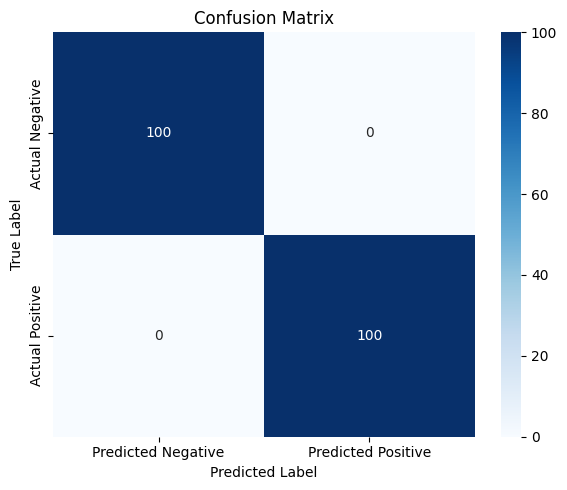

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [37]:
# Drop kolom non-TFIDF
X_tfidf_only = df.drop(columns=['clean_review', 'sentiment', 'fasttext_sentiment', 'fasttext_sentiment_num'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_only, y, test_size=0.2, random_state=42, stratify=y)

# Latih SVM
from sklearn.svm import SVC
svm_plain = SVC(kernel='linear', C=1.0)
svm_plain.fit(X_train, y_train)

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_plain = svm_plain.predict(X_test)
acc_plain = accuracy_score(y_test, y_pred_plain)

print(f"\nAccuracy (TF-IDF only): {acc_plain:.4f}")
print("\nClassification Report (TF-IDF only):")
print(classification_report(y_test, y_pred_plain, target_names=['negative', 'positive']))


Accuracy (TF-IDF only): 0.8150

Classification Report (TF-IDF only):
              precision    recall  f1-score   support

    negative       0.88      0.73      0.80       100
    positive       0.77      0.90      0.83       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



✅ Akurasi FastText: 1.0000

📄 Classification Report (FastText):
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       500
    positive       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



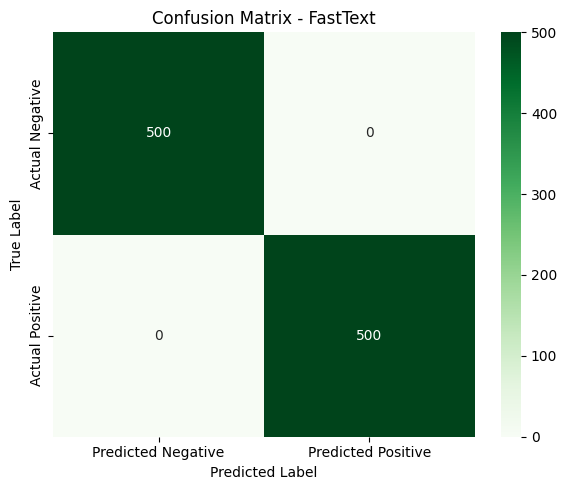

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Konversi label asli dan prediksi FastText ke angka
y_true = df['sentiment'].map({'positive': 1, 'negative': 0})
y_pred_ft = df['fasttext_sentiment'].map({'__label__positive': 1, '__label__negative': 0})

# 2. Hitung akurasi
accuracy_ft = accuracy_score(y_true, y_pred_ft)
print(f"✅ Akurasi FastText: {accuracy_ft:.4f}")

# 3. Classification report
print("\n📄 Classification Report (FastText):")
print(classification_report(y_true, y_pred_ft, target_names=['negative', 'positive']))

# 4. Confusion Matrix
conf_matrix_ft = confusion_matrix(y_true, y_pred_ft)

# 5. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_ft, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix - FastText")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()